# Working with structured data in Python using Pandas

In [101]:
import numpy as np
import requests
from bs4 import BeautifulSoup as beautifulSoup

In [102]:
URL='https://www.worldometers.info/coronavirus/' 

In [103]:
page = requests.get(URL) 

In [104]:
parser = beautifulSoup(page.content, 'html.parser')

In [105]:
table=parser.find("table")

In [106]:
output_rows = []
for table_row in table.findAll('tr'):
    columns = table_row.findAll('td')
    output_row = []
    for column in columns:
        output_row.append(column.text)
    output_rows.append(output_row)

In [108]:
output_rows


[[],
 ['\nNorth America\n',
  '1,494,247',
  '+21,866',
  '89,912',
  '+1,061',
  '305,034',
  '1,099,301',
  '17,659',
  '',
  '',
  '',
  '',
  'North America'],
 ['\nEurope\n',
  '1,628,457',
  '+22,628',
  '152,727',
  '+962',
  '658,290',
  '817,440',
  '13,990',
  '',
  '',
  '',
  '',
  'Europe'],
 ['\nSouth America\n',
  '309,220',
  '+11,266',
  '16,360',
  '+968',
  '105,210',
  '187,650',
  '10,112',
  '',
  '',
  '',
  '',
  'South America'],
 ['\nAsia\n',
  '668,605',
  '+17,721',
  '22,172',
  '+321',
  '369,413',
  '277,020',
  '4,995',
  '',
  '',
  '',
  '',
  'Asia'],
 ['\nAfrica\n',
  '64,286',
  '+2,301',
  '2,280',
  '+48',
  '22,567',
  '39,439',
  '235',
  '',
  '',
  '',
  '',
  'Africa'],
 ['\nOceania\n',
  '8,539',
  '+14',
  '118',
  '',
  '7,630',
  '791',
  '20',
  '',
  '',
  '',
  '',
  'Australia/Oceania'],
 ['\n\n', '721', '', '15', '', '645', '61', '4', '', '', '', '', ''],
 ['World',
  '4,174,075',
  '+75,796',
  '283,584',
  '+3,360',
  '1,468,789',


In [109]:
print(output_rows[9][0] ,output_rows[9][2])
print(output_rows[10][0] ,output_rows[10][2])
print(output_rows[11][0] ,output_rows[11][2])
print(output_rows[12][0] ,output_rows[12][2])
print(output_rows[13][0] ,output_rows[13][2])
print(output_rows[14][0] ,output_rows[14][2])
print(output_rows[15][0] ,output_rows[15][2])
print(output_rows[16][0] ,output_rows[16][2])
print(output_rows[17][0] ,output_rows[17][2])

USA +17,938
Spain +1,880
UK +3,923
Italy +802
Russia +11,012
France +312
Germany +456
Brazil +6,638
Turkey +1,542


In [110]:
import pandas as pd

data = {'Tara': [output_rows[9][0],output_rows[10][0],output_rows[11][0],output_rows[12][0],output_rows[13][0],output_rows[14][0],output_rows[15][0],output_rows[16][0],output_rows[17][0]],
        'Cazuri noi': [output_rows[9][1],output_rows[10][1],output_rows[11][1],output_rows[12][1],output_rows[13][1],output_rows[14][1],output_rows[15][1],output_rows[16][1],output_rows[17][1]]}

df = pd.DataFrame(data, columns= ['Tara', 'Cazuri noi'])

print (df)


from IPython.display import FileLink, FileLinks

df.to_csv(r"data.csv", index=False)
df.to_excel(r"data.xlsx", index=False)

      Tara Cazuri noi
0      USA  1,365,247
1    Spain    264,663
2       UK    219,183
3    Italy    219,070
4   Russia    209,688
5   France    176,970
6  Germany    171,780
7   Brazil    162,699
8   Turkey    138,657


print (output_rows[9][1].replace(',', '')) Am identificat o problema legata de numere

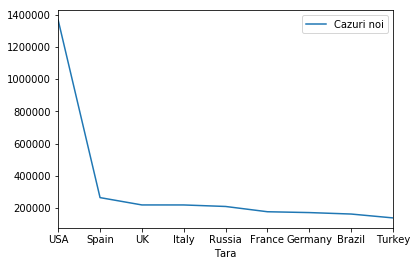

In [112]:
from pandas import DataFrame
import matplotlib.pyplot as plt
data = {'Tara': [output_rows[9][0],output_rows[10][0],output_rows[11][0],output_rows[12][0],output_rows[13][0],output_rows[14][0],output_rows[15][0],output_rows[16][0],output_rows[17][0]],
        'Cazuri noi': [output_rows[9][1].replace(',', ''),output_rows[10][1].replace(',', ''),output_rows[11][1].replace(',', ''),output_rows[12][1].replace(',', '')
                       ,output_rows[13][1].replace(',', ''),output_rows[14][1].replace(',', ''),output_rows[15][1].replace(',', ''),output_rows[16][1].replace(',', '')
                       ,output_rows[17][1].replace(',', '')]}
df = DataFrame(data,columns=['Tara','Cazuri noi'])

df['Cazuri noi'] = pd.to_numeric(df['Cazuri noi'])

df.plot(x ='Tara', y='Cazuri noi', kind = 'line')
plt.show()